In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_datadata

In [5]:
mnist=input_data.read_data_sets('C:/Users/Satish/Desktop/Tensorflow-Bootcamp-master/MNIST_Data',one_hot=True)

Extracting C:/Users/Satish/Desktop/Tensorflow-Bootcamp-master/MNIST_Data\train-images-idx3-ubyte.gz
Extracting C:/Users/Satish/Desktop/Tensorflow-Bootcamp-master/MNIST_Data\train-labels-idx1-ubyte.gz
Extracting C:/Users/Satish/Desktop/Tensorflow-Bootcamp-master/MNIST_Data\t10k-images-idx3-ubyte.gz
Extracting C:/Users/Satish/Desktop/Tensorflow-Bootcamp-master/MNIST_Data\t10k-labels-idx1-ubyte.gz


In [6]:
tf.reset_default_graph()

In [7]:
#784
#392
#196
#392
#784

In [9]:
num_inputs=784
neurons_hid1=392
neurons_hid2=196
neurons_hid3=neurons_hid1
num_outputs=num_inputs

In [10]:
learning_rate=0.01

In [11]:
actf=tf.nn.relu

In [12]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [13]:
initializer=tf.variance_scaling_initializer()

In [15]:
w1=tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [17]:
b1=tf.Variable(tf.zeros(neurons_hid1))
b2=tf.Variable(tf.zeros(neurons_hid2))
b3=tf.Variable(tf.zeros(neurons_hid3))
b4=tf.Variable(tf.zeros(num_outputs))

In [18]:
act_func=tf.nn.relu

In [19]:
hid_layer1=act_func(tf.matmul(X,w1) + b1)
hid_layer2=act_func(tf.matmul(hid_layer1,w2) + b2)
hid_layer3=act_func(tf.matmul(hid_layer2,w3) + b3)
output_layer=act_func(tf.matmul(hid_layer3,w4) + b4)

In [20]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [21]:
optimizer=tf.train.AdamOptimizer(learning_rate)

In [22]:
train=optimizer.minimize(loss)

In [23]:
init=tf.global_variables_initializer()

In [24]:
saver=tf.train.Saver()

In [26]:
num_epochs=5

batch_size=150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches=mnist.train.num_examples//batch_size
        
        for iteration in range(num_batches):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        training_loss=loss.eval(feed_dict={X:X_batch})
        
        print("Epoch : {}  Loss :  {}".format(epoch,training_loss))
        
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

Epoch : 0  Loss :  0.0325632318854332
Epoch : 1  Loss :  0.0288497656583786
Epoch : 2  Loss :  0.027458835393190384
Epoch : 3  Loss :  0.026805872097611427
Epoch : 4  Loss :  0.0270448736846447


In [28]:
num_test_images=10

with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    result=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


In [30]:
result

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

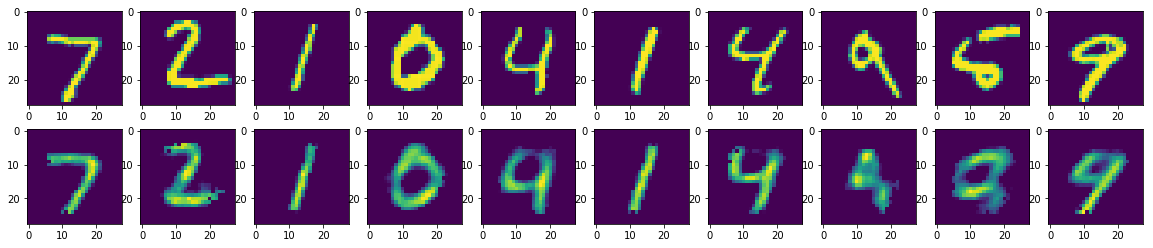

In [32]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(result[i], (28, 28)))